## Keras Layered Model & Explorations - JoanieW

Based on: https://elix-tech.github.io/ja/2016/06/02/kaggle-facial-keypoints-ja.html#conv

And modeled after Jackie's code structure for Lenet5

In [26]:
import os
import imp
import pickle
import numpy as np
import pandas as pd
from utils import predict_models, load_models, transform_data
from keras.models import Sequential, Model, model_from_json

In [3]:
cd ..

/Users/joanieweaver/Desktop/intro_ml/blackboxes


In [14]:
### this is gold right here.
imp.reload(load_models)
file_path = "cleantrain/"
trainer = load_models.LoadTrainModels("data/models/", file_path)

trainer.print_paths()

Model dir: data/models/
Pickle dir: cleantrain/


### For every version of a clean Train file in a given path, create and save a model

Opening file:  clean_w_dups.p
cleantrain/clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_jcw
Scaling 6488 images...
Scaling of 6488 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        288       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32

162/162 [==============================] - 3s 20ms/step - loss: 0.0025 - mae: 0.0374 - mse: 0.0025 - val_loss: 0.0064 - val_mae: 0.0553 - val_mse: 0.0064

Epoch 00021: val_mae improved from 0.05587 to 0.05528, saving model to data/models/clean_w_dups_jcw.h5
Epoch 22/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0024 - mae: 0.0367 - mse: 0.0024 - val_loss: 0.0067 - val_mae: 0.0572 - val_mse: 0.0067

Epoch 00022: val_mae did not improve from 0.05528
Epoch 23/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0035 - mae: 0.0435 - mse: 0.0035 - val_loss: 0.0063 - val_mae: 0.0548 - val_mse: 0.0063

Epoch 00023: val_mae improved from 0.05528 to 0.05475, saving model to data/models/clean_w_dups_jcw.h5
Epoch 24/300
162/162 [==============================] - 3s 19ms/step - loss: 0.0023 - mae: 0.0364 - mse: 0.0023 - val_loss: 0.0065 - val_mae: 0.0558 - val_mse: 0.0065

Epoch 00024: val_mae did not improve from 0.05475
Epoch 25/300
162/162 [=============

162/162 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0254 - mse: 0.0012 - val_loss: 0.0053 - val_mae: 0.0493 - val_mse: 0.0053

Epoch 00056: val_mae did not improve from 0.04906
Epoch 57/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0013 - mae: 0.0261 - mse: 0.0013 - val_loss: 0.0053 - val_mae: 0.0495 - val_mse: 0.0053

Epoch 00057: val_mae did not improve from 0.04906
Epoch 58/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - val_loss: 0.0052 - val_mae: 0.0482 - val_mse: 0.0052

Epoch 00058: val_mae improved from 0.04906 to 0.04819, saving model to data/models/clean_w_dups_jcw.h5
Epoch 59/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0015 - mae: 0.0263 - mse: 0.0015 - val_loss: 0.0054 - val_mae: 0.0489 - val_mse: 0.0054

Epoch 00059: val_mae did not improve from 0.04819
Epoch 60/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0011 - ma


Epoch 00092: val_mae did not improve from 0.04690
Epoch 93/300
162/162 [==============================] - 3s 21ms/step - loss: 0.0010 - mae: 0.0210 - mse: 0.0010 - val_loss: 0.0049 - val_mae: 0.0466 - val_mse: 0.0049

Epoch 00093: val_mae improved from 0.04690 to 0.04664, saving model to data/models/clean_w_dups_jcw.h5
Epoch 94/300
162/162 [==============================] - 3s 21ms/step - loss: 8.1042e-04 - mae: 0.0203 - mse: 8.1042e-04 - val_loss: 0.0049 - val_mae: 0.0469 - val_mse: 0.0049

Epoch 00094: val_mae did not improve from 0.04664
Epoch 95/300
162/162 [==============================] - 4s 22ms/step - loss: 7.9823e-04 - mae: 0.0205 - mse: 7.9823e-04 - val_loss: 0.0051 - val_mae: 0.0472 - val_mse: 0.0051

Epoch 00095: val_mae did not improve from 0.04664
Epoch 96/300
162/162 [==============================] - 4s 22ms/step - loss: 8.8404e-04 - mae: 0.0198 - mse: 8.8404e-04 - val_loss: 0.0052 - val_mae: 0.0478 - val_mse: 0.0052

Epoch 00096: val_mae did not improve from 0.04664



Epoch 00127: val_mae did not improve from 0.04577
Epoch 128/300
162/162 [==============================] - 3s 19ms/step - loss: 5.6021e-04 - mae: 0.0178 - mse: 5.6021e-04 - val_loss: 0.0049 - val_mae: 0.0467 - val_mse: 0.0049

Epoch 00128: val_mae did not improve from 0.04577
Epoch 129/300
162/162 [==============================] - 3s 18ms/step - loss: 4.8948e-04 - mae: 0.0165 - mse: 4.8948e-04 - val_loss: 0.0048 - val_mae: 0.0459 - val_mse: 0.0048

Epoch 00129: val_mae did not improve from 0.04577
Epoch 130/300
162/162 [==============================] - 3s 18ms/step - loss: 5.6389e-04 - mae: 0.0177 - mse: 5.6389e-04 - val_loss: 0.0048 - val_mae: 0.0460 - val_mse: 0.0048

Epoch 00130: val_mae did not improve from 0.04577
Epoch 131/300
162/162 [==============================] - 3s 19ms/step - loss: 7.8692e-04 - mae: 0.0201 - mse: 7.8692e-04 - val_loss: 0.0051 - val_mae: 0.0475 - val_mse: 0.0051

Epoch 00131: val_mae did not improve from 0.04577
Epoch 132/300
162/162 [==================


Epoch 00163: val_mae improved from 0.04521 to 0.04490, saving model to data/models/clean_w_dups_jcw.h5
Epoch 164/300
162/162 [==============================] - 3s 20ms/step - loss: 4.0012e-04 - mae: 0.0142 - mse: 4.0012e-04 - val_loss: 0.0047 - val_mae: 0.0449 - val_mse: 0.0047

Epoch 00164: val_mae improved from 0.04490 to 0.04489, saving model to data/models/clean_w_dups_jcw.h5
Epoch 165/300
162/162 [==============================] - 3s 20ms/step - loss: 3.6266e-04 - mae: 0.0143 - mse: 3.6266e-04 - val_loss: 0.0047 - val_mae: 0.0452 - val_mse: 0.0047

Epoch 00165: val_mae did not improve from 0.04489
Epoch 166/300
162/162 [==============================] - 3s 20ms/step - loss: 5.2093e-04 - mae: 0.0170 - mse: 5.2093e-04 - val_loss: 0.0048 - val_mae: 0.0456 - val_mse: 0.0048

Epoch 00166: val_mae did not improve from 0.04489
Epoch 167/300
162/162 [==============================] - 3s 19ms/step - loss: 4.1067e-04 - mae: 0.0153 - mse: 4.1067e-04 - val_loss: 0.0047 - val_mae: 0.0450 - va


Epoch 00198: val_mae did not improve from 0.04446
Epoch 199/300
162/162 [==============================] - 3s 20ms/step - loss: 3.8742e-04 - mae: 0.0143 - mse: 3.8742e-04 - val_loss: 0.0047 - val_mae: 0.0451 - val_mse: 0.0047

Epoch 00199: val_mae did not improve from 0.04446
Epoch 200/300
162/162 [==============================] - 3s 21ms/step - loss: 3.6491e-04 - mae: 0.0141 - mse: 3.6491e-04 - val_loss: 0.0047 - val_mae: 0.0454 - val_mse: 0.0047

Epoch 00200: val_mae did not improve from 0.04446
Epoch 201/300
162/162 [==============================] - 3s 19ms/step - loss: 4.0974e-04 - mae: 0.0154 - mse: 4.0974e-04 - val_loss: 0.0046 - val_mae: 0.0447 - val_mse: 0.0046

Epoch 00201: val_mae did not improve from 0.04446
Epoch 202/300
162/162 [==============================] - 3s 19ms/step - loss: 3.8314e-04 - mae: 0.0143 - mse: 3.8314e-04 - val_loss: 0.0047 - val_mae: 0.0451 - val_mse: 0.0047

Epoch 00202: val_mae did not improve from 0.04446
Epoch 203/300
162/162 [==================

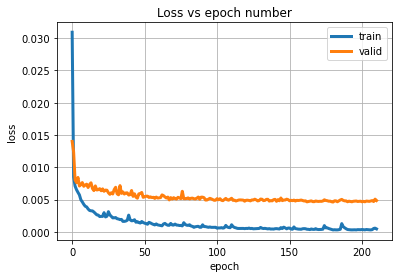

clean_w_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
cleantrain/clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_jcw
Scaling 7041 images...
Scaling of 7041 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________

175/175 [==============================] - 3s 20ms/step - loss: 0.0026 - mae: 0.0381 - mse: 0.0026 - val_loss: 0.0059 - val_mae: 0.0534 - val_mse: 0.0059

Epoch 00020: val_mae improved from 0.05470 to 0.05339, saving model to data/models/clean_w_outliers_jcw.h5
Epoch 21/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0025 - mae: 0.0377 - mse: 0.0025 - val_loss: 0.0060 - val_mae: 0.0543 - val_mse: 0.0060

Epoch 00021: val_mae did not improve from 0.05339
Epoch 22/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0023 - mae: 0.0363 - mse: 0.0023 - val_loss: 0.0060 - val_mae: 0.0540 - val_mse: 0.0060

Epoch 00022: val_mae did not improve from 0.05339
Epoch 23/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0026 - mae: 0.0380 - mse: 0.0026 - val_loss: 0.0060 - val_mae: 0.0534 - val_mse: 0.0060

Epoch 00023: val_mae did not improve from 0.05339
Epoch 24/300
175/175 [==============================] - 4s 21ms/step - loss: 0.0025 

175/175 [==============================] - 4s 20ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - val_loss: 0.0052 - val_mae: 0.0482 - val_mse: 0.0052

Epoch 00055: val_mae did not improve from 0.04713
Epoch 56/300
175/175 [==============================] - 4s 21ms/step - loss: 0.0012 - mae: 0.0252 - mse: 0.0012 - val_loss: 0.0050 - val_mae: 0.0473 - val_mse: 0.0050

Epoch 00056: val_mae did not improve from 0.04713
Epoch 57/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0011 - mae: 0.0246 - mse: 0.0011 - val_loss: 0.0050 - val_mae: 0.0476 - val_mse: 0.0050

Epoch 00057: val_mae did not improve from 0.04713
Epoch 58/300
175/175 [==============================] - 4s 21ms/step - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - val_loss: 0.0049 - val_mae: 0.0468 - val_mse: 0.0049

Epoch 00058: val_mae improved from 0.04713 to 0.04681, saving model to data/models/clean_w_outliers_jcw.h5
Epoch 59/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0015 


Epoch 00090: val_mae did not improve from 0.04493
Epoch 91/300
175/175 [==============================] - 3s 19ms/step - loss: 7.5407e-04 - mae: 0.0200 - mse: 7.5407e-04 - val_loss: 0.0048 - val_mae: 0.0460 - val_mse: 0.0048

Epoch 00091: val_mae did not improve from 0.04493
Epoch 92/300
175/175 [==============================] - 3s 20ms/step - loss: 7.1805e-04 - mae: 0.0193 - mse: 7.1805e-04 - val_loss: 0.0047 - val_mae: 0.0455 - val_mse: 0.0047

Epoch 00092: val_mae did not improve from 0.04493
Epoch 93/300
175/175 [==============================] - 4s 20ms/step - loss: 7.8198e-04 - mae: 0.0202 - mse: 7.8198e-04 - val_loss: 0.0046 - val_mae: 0.0449 - val_mse: 0.0046

Epoch 00093: val_mae improved from 0.04493 to 0.04491, saving model to data/models/clean_w_outliers_jcw.h5
Epoch 94/300
175/175 [==============================] - 3s 20ms/step - loss: 6.5671e-04 - mae: 0.0190 - mse: 6.5671e-04 - val_loss: 0.0048 - val_mae: 0.0457 - val_mse: 0.0048

Epoch 00094: val_mae did not improve f


Epoch 00125: val_mae did not improve from 0.04386
Epoch 126/300
175/175 [==============================] - 4s 20ms/step - loss: 4.7154e-04 - mae: 0.0161 - mse: 4.7154e-04 - val_loss: 0.0047 - val_mae: 0.0453 - val_mse: 0.0047

Epoch 00126: val_mae did not improve from 0.04386
Epoch 127/300
175/175 [==============================] - 4s 20ms/step - loss: 4.5992e-04 - mae: 0.0160 - mse: 4.5992e-04 - val_loss: 0.0046 - val_mae: 0.0444 - val_mse: 0.0046

Epoch 00127: val_mae did not improve from 0.04386
Epoch 128/300
175/175 [==============================] - 4s 20ms/step - loss: 5.7764e-04 - mae: 0.0169 - mse: 5.7764e-04 - val_loss: 0.0046 - val_mae: 0.0440 - val_mse: 0.0046

Epoch 00128: val_mae did not improve from 0.04386
Epoch 129/300
175/175 [==============================] - 3s 20ms/step - loss: 5.3597e-04 - mae: 0.0163 - mse: 5.3597e-04 - val_loss: 0.0046 - val_mae: 0.0441 - val_mse: 0.0046

Epoch 00129: val_mae did not improve from 0.04386
Epoch 130/300
175/175 [==================

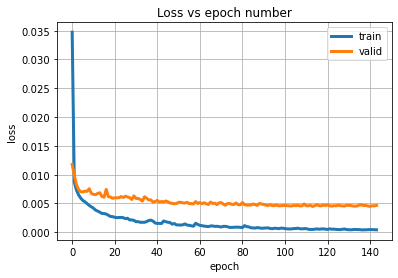

clean_w_outliers_jcw model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
cleantrain/clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_jcw
Scaling 6483 images...
Scaling of 6483 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________

161/161 [==============================] - 3s 19ms/step - loss: 0.0025 - mae: 0.0376 - mse: 0.0025 - val_loss: 0.0065 - val_mae: 0.0571 - val_mse: 0.0065

Epoch 00020: val_mae did not improve from 0.05667
Epoch 21/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0025 - mae: 0.0378 - mse: 0.0025 - val_loss: 0.0070 - val_mae: 0.0605 - val_mse: 0.0070

Epoch 00021: val_mae did not improve from 0.05667
Epoch 22/300
161/161 [==============================] - 3s 19ms/step - loss: 0.0024 - mae: 0.0366 - mse: 0.0024 - val_loss: 0.0068 - val_mae: 0.0582 - val_mse: 0.0068

Epoch 00022: val_mae did not improve from 0.05667
Epoch 23/300
161/161 [==============================] - 3s 19ms/step - loss: 0.0022 - mae: 0.0351 - mse: 0.0022 - val_loss: 0.0067 - val_mae: 0.0587 - val_mse: 0.0067

Epoch 00023: val_mae did not improve from 0.05667
Epoch 24/300
161/161 [==============================] - 3s 19ms/step - loss: 0.0022 - mae: 0.0357 - mse: 0.0022 - val_loss: 0.0070 - val_mae:

161/161 [==============================] - 3s 19ms/step - loss: 0.0013 - mae: 0.0262 - mse: 0.0013 - val_loss: 0.0054 - val_mae: 0.0510 - val_mse: 0.0054

Epoch 00056: val_mae improved from 0.05121 to 0.05101, saving model to data/models/clean_o_dups_jcw.h5
Epoch 57/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - val_loss: 0.0054 - val_mae: 0.0508 - val_mse: 0.0054

Epoch 00057: val_mae improved from 0.05101 to 0.05084, saving model to data/models/clean_o_dups_jcw.h5
Epoch 58/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - val_loss: 0.0053 - val_mae: 0.0501 - val_mse: 0.0053

Epoch 00058: val_mae improved from 0.05084 to 0.05009, saving model to data/models/clean_o_dups_jcw.h5
Epoch 59/300
161/161 [==============================] - 3s 19ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - val_loss: 0.0052 - val_mae: 0.0500 - val_mse: 0.0052

Epoch 00059: val_mae improved fr

161/161 [==============================] - 3s 19ms/step - loss: 6.4032e-04 - mae: 0.0189 - mse: 6.4032e-04 - val_loss: 0.0048 - val_mae: 0.0475 - val_mse: 0.0048

Epoch 00091: val_mae improved from 0.04784 to 0.04748, saving model to data/models/clean_o_dups_jcw.h5
Epoch 92/300
161/161 [==============================] - 3s 19ms/step - loss: 6.8009e-04 - mae: 0.0193 - mse: 6.8009e-04 - val_loss: 0.0055 - val_mae: 0.0513 - val_mse: 0.0055

Epoch 00092: val_mae did not improve from 0.04748
Epoch 93/300
161/161 [==============================] - 3s 19ms/step - loss: 0.0010 - mae: 0.0202 - mse: 0.0010 - val_loss: 0.0051 - val_mae: 0.0487 - val_mse: 0.0051

Epoch 00093: val_mae did not improve from 0.04748
Epoch 94/300
161/161 [==============================] - 3s 20ms/step - loss: 6.3903e-04 - mae: 0.0189 - mse: 6.3903e-04 - val_loss: 0.0052 - val_mae: 0.0494 - val_mse: 0.0052

Epoch 00094: val_mae did not improve from 0.04748
Epoch 95/300
161/161 [==============================] - 3s 20ms/

161/161 [==============================] - 3s 20ms/step - loss: 4.4666e-04 - mae: 0.0157 - mse: 4.4666e-04 - val_loss: 0.0049 - val_mae: 0.0480 - val_mse: 0.0049

Epoch 00126: val_mae did not improve from 0.04618
Epoch 127/300
161/161 [==============================] - 3s 19ms/step - loss: 3.9607e-04 - mae: 0.0150 - mse: 3.9607e-04 - val_loss: 0.0047 - val_mae: 0.0465 - val_mse: 0.0047

Epoch 00127: val_mae did not improve from 0.04618
Epoch 128/300
161/161 [==============================] - 3s 19ms/step - loss: 4.3863e-04 - mae: 0.0156 - mse: 4.3863e-04 - val_loss: 0.0046 - val_mae: 0.0460 - val_mse: 0.0046

Epoch 00128: val_mae improved from 0.04618 to 0.04598, saving model to data/models/clean_o_dups_jcw.h5
Epoch 129/300
161/161 [==============================] - 3s 19ms/step - loss: 4.2603e-04 - mae: 0.0152 - mse: 4.2603e-04 - val_loss: 0.0052 - val_mae: 0.0502 - val_mse: 0.0052

Epoch 00129: val_mae did not improve from 0.04598
Epoch 130/300
161/161 [==============================

161/161 [==============================] - 3s 19ms/step - loss: 3.4995e-04 - mae: 0.0138 - mse: 3.4995e-04 - val_loss: 0.0047 - val_mae: 0.0468 - val_mse: 0.0047

Epoch 00161: val_mae did not improve from 0.04539
Epoch 162/300
161/161 [==============================] - 3s 20ms/step - loss: 4.0059e-04 - mae: 0.0146 - mse: 4.0059e-04 - val_loss: 0.0047 - val_mae: 0.0461 - val_mse: 0.0047

Epoch 00162: val_mae did not improve from 0.04539
Epoch 163/300
161/161 [==============================] - 3s 20ms/step - loss: 4.3457e-04 - mae: 0.0146 - mse: 4.3457e-04 - val_loss: 0.0046 - val_mae: 0.0461 - val_mse: 0.0046

Epoch 00163: val_mae did not improve from 0.04539
Epoch 164/300
161/161 [==============================] - 3s 21ms/step - loss: 3.8572e-04 - mae: 0.0146 - mse: 3.8572e-04 - val_loss: 0.0046 - val_mae: 0.0460 - val_mse: 0.0046

Epoch 00164: val_mae did not improve from 0.04539
Epoch 165/300
161/161 [==============================] - 3s 20ms/step - loss: 4.0025e-04 - mae: 0.0148 - m

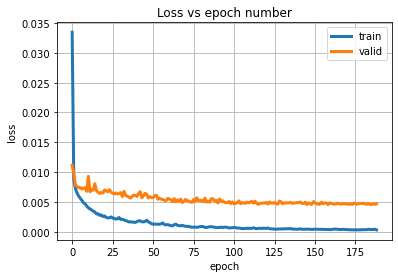

clean_o_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
cleantrain/clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_jcw
Scaling 6478 images...
Scaling of 6478 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
__________________________

161/161 [==============================] - 3s 21ms/step - loss: 0.0023 - mae: 0.0363 - mse: 0.0023 - val_loss: 0.0066 - val_mae: 0.0576 - val_mse: 0.0066

Epoch 00020: val_mae did not improve from 0.05626
Epoch 21/300
161/161 [==============================] - 3s 21ms/step - loss: 0.0025 - mae: 0.0367 - mse: 0.0025 - val_loss: 0.0066 - val_mae: 0.0587 - val_mse: 0.0066

Epoch 00021: val_mae did not improve from 0.05626
Epoch 22/300
161/161 [==============================] - 3s 21ms/step - loss: 0.0020 - mae: 0.0340 - mse: 0.0020 - val_loss: 0.0061 - val_mae: 0.0549 - val_mse: 0.0061

Epoch 00022: val_mae improved from 0.05626 to 0.05491, saving model to data/models/clean_wo_dups_jcw.h5
Epoch 23/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0020 - mae: 0.0332 - mse: 0.0020 - val_loss: 0.0066 - val_mae: 0.0578 - val_mse: 0.0066

Epoch 00023: val_mae did not improve from 0.05491
Epoch 24/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0020 - m

161/161 [==============================] - 3s 21ms/step - loss: 0.0010 - mae: 0.0237 - mse: 0.0010 - val_loss: 0.0057 - val_mae: 0.0524 - val_mse: 0.0057

Epoch 00056: val_mae did not improve from 0.05016
Epoch 57/300
161/161 [==============================] - 3s 21ms/step - loss: 0.0013 - mae: 0.0260 - mse: 0.0013 - val_loss: 0.0052 - val_mae: 0.0494 - val_mse: 0.0052

Epoch 00057: val_mae improved from 0.05016 to 0.04937, saving model to data/models/clean_wo_dups_jcw.h5
Epoch 58/300
161/161 [==============================] - 3s 22ms/step - loss: 0.0011 - mae: 0.0240 - mse: 0.0011 - val_loss: 0.0053 - val_mae: 0.0501 - val_mse: 0.0053

Epoch 00058: val_mae did not improve from 0.04937
Epoch 59/300
161/161 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0254 - mse: 0.0012 - val_loss: 0.0059 - val_mae: 0.0526 - val_mse: 0.0059

Epoch 00059: val_mae did not improve from 0.04937
Epoch 60/300
161/161 [==============================] - 3s 21ms/step - loss: 0.0012 - m

161/161 [==============================] - 3s 21ms/step - loss: 7.8796e-04 - mae: 0.0201 - mse: 7.8796e-04 - val_loss: 0.0048 - val_mae: 0.0474 - val_mse: 0.0048

Epoch 00091: val_mae did not improve from 0.04724
Epoch 92/300
161/161 [==============================] - 3s 21ms/step - loss: 7.9266e-04 - mae: 0.0196 - mse: 7.9266e-04 - val_loss: 0.0050 - val_mae: 0.0481 - val_mse: 0.0050

Epoch 00092: val_mae did not improve from 0.04724
Epoch 93/300
161/161 [==============================] - 3s 20ms/step - loss: 6.2489e-04 - mae: 0.0186 - mse: 6.2489e-04 - val_loss: 0.0049 - val_mae: 0.0475 - val_mse: 0.0049

Epoch 00093: val_mae did not improve from 0.04724
Epoch 94/300
161/161 [==============================] - 3s 20ms/step - loss: 6.8456e-04 - mae: 0.0191 - mse: 6.8456e-04 - val_loss: 0.0049 - val_mae: 0.0476 - val_mse: 0.0049

Epoch 00094: val_mae did not improve from 0.04724
Epoch 95/300
161/161 [==============================] - 3s 20ms/step - loss: 8.5837e-04 - mae: 0.0196 - mse: 

161/161 [==============================] - 3s 20ms/step - loss: 4.4270e-04 - mae: 0.0154 - mse: 4.4270e-04 - val_loss: 0.0049 - val_mae: 0.0469 - val_mse: 0.0049

Epoch 00126: val_mae did not improve from 0.04599
Epoch 127/300
161/161 [==============================] - 3s 21ms/step - loss: 4.6501e-04 - mae: 0.0153 - mse: 4.6501e-04 - val_loss: 0.0047 - val_mae: 0.0463 - val_mse: 0.0047

Epoch 00127: val_mae did not improve from 0.04599
Epoch 128/300
161/161 [==============================] - 3s 21ms/step - loss: 4.6609e-04 - mae: 0.0157 - mse: 4.6609e-04 - val_loss: 0.0047 - val_mae: 0.0461 - val_mse: 0.0047

Epoch 00128: val_mae did not improve from 0.04599
Epoch 129/300
161/161 [==============================] - 3s 21ms/step - loss: 3.9453e-04 - mae: 0.0145 - mse: 3.9453e-04 - val_loss: 0.0049 - val_mae: 0.0472 - val_mse: 0.0049

Epoch 00129: val_mae did not improve from 0.04599
Epoch 130/300
161/161 [==============================] - 3s 21ms/step - loss: 4.3796e-04 - mae: 0.0154 - m


Epoch 00161: val_mae did not improve from 0.04492
Epoch 162/300
161/161 [==============================] - 3s 19ms/step - loss: 3.8975e-04 - mae: 0.0142 - mse: 3.8975e-04 - val_loss: 0.0048 - val_mae: 0.0468 - val_mse: 0.0048

Epoch 00162: val_mae did not improve from 0.04492
Epoch 163/300
161/161 [==============================] - 3s 19ms/step - loss: 3.5757e-04 - mae: 0.0138 - mse: 3.5757e-04 - val_loss: 0.0047 - val_mae: 0.0459 - val_mse: 0.0047

Epoch 00163: val_mae did not improve from 0.04492
Epoch 164/300
161/161 [==============================] - 3s 19ms/step - loss: 3.4454e-04 - mae: 0.0137 - mse: 3.4454e-04 - val_loss: 0.0046 - val_mae: 0.0452 - val_mse: 0.0046

Epoch 00164: val_mae did not improve from 0.04492
Epoch 165/300
161/161 [==============================] - 3s 20ms/step - loss: 3.8609e-04 - mae: 0.0142 - mse: 3.8609e-04 - val_loss: 0.0046 - val_mae: 0.0455 - val_mse: 0.0046

Epoch 00165: val_mae did not improve from 0.04492
Epoch 166/300
161/161 [==================


Epoch 00197: val_mae did not improve from 0.04483
Epoch 198/300
161/161 [==============================] - 3s 19ms/step - loss: 2.5093e-04 - mae: 0.0118 - mse: 2.5093e-04 - val_loss: 0.0048 - val_mae: 0.0464 - val_mse: 0.0048

Epoch 00198: val_mae did not improve from 0.04483
Epoch 199/300
161/161 [==============================] - 3s 19ms/step - loss: 3.0152e-04 - mae: 0.0127 - mse: 3.0152e-04 - val_loss: 0.0046 - val_mae: 0.0453 - val_mse: 0.0046

Epoch 00199: val_mae did not improve from 0.04483
Epoch 200/300
161/161 [==============================] - 3s 20ms/step - loss: 3.2223e-04 - mae: 0.0129 - mse: 3.2223e-04 - val_loss: 0.0046 - val_mae: 0.0455 - val_mse: 0.0046

Epoch 00200: val_mae did not improve from 0.04483
Epoch 201/300
161/161 [==============================] - 3s 20ms/step - loss: 2.9252e-04 - mae: 0.0124 - mse: 2.9252e-04 - val_loss: 0.0047 - val_mae: 0.0462 - val_mse: 0.0047

Epoch 00201: val_mae did not improve from 0.04483
Epoch 202/300
161/161 [==================

161/161 [==============================] - 3s 21ms/step - loss: 2.3768e-04 - mae: 0.0114 - mse: 2.3768e-04 - val_loss: 0.0047 - val_mae: 0.0461 - val_mse: 0.0047

Epoch 00233: val_mae did not improve from 0.04463
Epoch 234/300
161/161 [==============================] - 3s 21ms/step - loss: 2.4057e-04 - mae: 0.0115 - mse: 2.4057e-04 - val_loss: 0.0045 - val_mae: 0.0450 - val_mse: 0.0045

Epoch 00234: val_mae did not improve from 0.04463
Epoch 235/300
161/161 [==============================] - 3s 21ms/step - loss: 2.3497e-04 - mae: 0.0113 - mse: 2.3497e-04 - val_loss: 0.0045 - val_mae: 0.0449 - val_mse: 0.0045

Epoch 00235: val_mae did not improve from 0.04463
Epoch 236/300
161/161 [==============================] - 3s 21ms/step - loss: 2.1549e-04 - mae: 0.0109 - mse: 2.1549e-04 - val_loss: 0.0048 - val_mae: 0.0463 - val_mse: 0.0048

Epoch 00236: val_mae did not improve from 0.04463
Epoch 237/300
161/161 [==============================] - 3s 21ms/step - loss: 1.9723e-04 - mae: 0.0105 - m

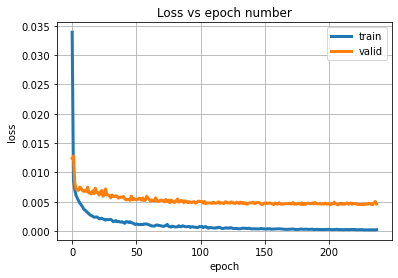

clean_wo_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_all_outliers.p
cleantrain/clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_jcw
Scaling 7041 images...
Scaling of 7041 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 32)        0         
__________

175/175 [==============================] - 3s 20ms/step - loss: 0.0023 - mae: 0.0364 - mse: 0.0023 - val_loss: 0.0058 - val_mae: 0.0534 - val_mse: 0.0058

Epoch 00020: val_mae improved from 0.05436 to 0.05338, saving model to data/models/clean_all_outliers_jcw.h5
Epoch 21/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0022 - mae: 0.0352 - mse: 0.0022 - val_loss: 0.0063 - val_mae: 0.0553 - val_mse: 0.0063

Epoch 00021: val_mae did not improve from 0.05338
Epoch 22/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - val_loss: 0.0062 - val_mae: 0.0549 - val_mse: 0.0062

Epoch 00022: val_mae did not improve from 0.05338
Epoch 23/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0024 - mae: 0.0354 - mse: 0.0024 - val_loss: 0.0060 - val_mae: 0.0535 - val_mse: 0.0060

Epoch 00023: val_mae did not improve from 0.05338
Epoch 24/300
175/175 [==============================] - 3s 20ms/step - loss: 0.002

175/175 [==============================] - 3s 20ms/step - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - val_loss: 0.0049 - val_mae: 0.0463 - val_mse: 0.0049

Epoch 00055: val_mae improved from 0.04733 to 0.04632, saving model to data/models/clean_all_outliers_jcw.h5
Epoch 56/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0250 - mse: 0.0012 - val_loss: 0.0053 - val_mae: 0.0495 - val_mse: 0.0053

Epoch 00056: val_mae did not improve from 0.04632
Epoch 57/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0014 - mae: 0.0254 - mse: 0.0014 - val_loss: 0.0050 - val_mae: 0.0485 - val_mse: 0.0050

Epoch 00057: val_mae did not improve from 0.04632
Epoch 58/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - val_loss: 0.0051 - val_mae: 0.0491 - val_mse: 0.0051

Epoch 00058: val_mae did not improve from 0.04632
Epoch 59/300
175/175 [==============================] - 4s 20ms/step - loss: 0.001


Epoch 00090: val_mae did not improve from 0.04482
Epoch 91/300
175/175 [==============================] - 4s 20ms/step - loss: 6.3187e-04 - mae: 0.0189 - mse: 6.3187e-04 - val_loss: 0.0046 - val_mae: 0.0449 - val_mse: 0.0046

Epoch 00091: val_mae did not improve from 0.04482
Epoch 92/300
175/175 [==============================] - 3s 20ms/step - loss: 6.4163e-04 - mae: 0.0187 - mse: 6.4163e-04 - val_loss: 0.0047 - val_mae: 0.0450 - val_mse: 0.0047

Epoch 00092: val_mae did not improve from 0.04482
Epoch 93/300
175/175 [==============================] - 4s 20ms/step - loss: 8.2065e-04 - mae: 0.0204 - mse: 8.2065e-04 - val_loss: 0.0050 - val_mae: 0.0470 - val_mse: 0.0050

Epoch 00093: val_mae did not improve from 0.04482
Epoch 94/300
175/175 [==============================] - 4s 22ms/step - loss: 7.8218e-04 - mae: 0.0193 - mse: 7.8218e-04 - val_loss: 0.0046 - val_mae: 0.0446 - val_mse: 0.0046

Epoch 00094: val_mae improved from 0.04482 to 0.04463, saving model to data/models/clean_all_ou

175/175 [==============================] - 3s 19ms/step - loss: 4.2374e-04 - mae: 0.0153 - mse: 4.2374e-04 - val_loss: 0.0045 - val_mae: 0.0435 - val_mse: 0.0045

Epoch 00125: val_mae did not improve from 0.04315
Epoch 126/300
175/175 [==============================] - 3s 20ms/step - loss: 4.3323e-04 - mae: 0.0153 - mse: 4.3323e-04 - val_loss: 0.0046 - val_mae: 0.0443 - val_mse: 0.0046

Epoch 00126: val_mae did not improve from 0.04315
Epoch 127/300
175/175 [==============================] - 4s 20ms/step - loss: 4.3781e-04 - mae: 0.0152 - mse: 4.3781e-04 - val_loss: 0.0046 - val_mae: 0.0440 - val_mse: 0.0046

Epoch 00127: val_mae did not improve from 0.04315
Epoch 128/300
175/175 [==============================] - 3s 20ms/step - loss: 4.6724e-04 - mae: 0.0159 - mse: 4.6724e-04 - val_loss: 0.0046 - val_mae: 0.0444 - val_mse: 0.0046

Epoch 00128: val_mae did not improve from 0.04315
Epoch 129/300
175/175 [==============================] - 3s 20ms/step - loss: 4.5074e-04 - mae: 0.0156 - m

175/175 [==============================] - 4s 21ms/step - loss: 4.0534e-04 - mae: 0.0148 - mse: 4.0534e-04 - val_loss: 0.0044 - val_mae: 0.0430 - val_mse: 0.0044

Epoch 00160: val_mae did not improve from 0.04248
Epoch 161/300
175/175 [==============================] - 4s 21ms/step - loss: 3.8952e-04 - mae: 0.0142 - mse: 3.8952e-04 - val_loss: 0.0045 - val_mae: 0.0435 - val_mse: 0.0045

Epoch 00161: val_mae did not improve from 0.04248
Epoch 162/300
175/175 [==============================] - 4s 20ms/step - loss: 3.5142e-04 - mae: 0.0139 - mse: 3.5142e-04 - val_loss: 0.0045 - val_mae: 0.0438 - val_mse: 0.0045

Epoch 00162: val_mae did not improve from 0.04248
Epoch 163/300
175/175 [==============================] - 4s 21ms/step - loss: 3.4952e-04 - mae: 0.0138 - mse: 3.4952e-04 - val_loss: 0.0046 - val_mae: 0.0443 - val_mse: 0.0046

Epoch 00163: val_mae did not improve from 0.04248
Epoch 164/300
175/175 [==============================] - 4s 20ms/step - loss: 3.8722e-04 - mae: 0.0142 - m

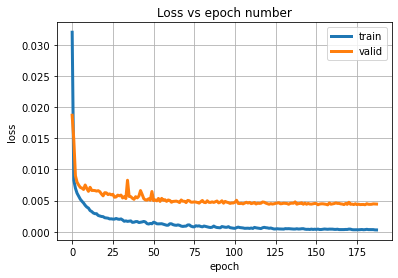

clean_all_outliers_jcw model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
cleantrain/clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_jcw
Scaling 6494 images...
Scaling of 6494 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 32)        0         
___________


Epoch 00020: val_mae did not improve from 0.05688
Epoch 21/300
162/162 [==============================] - 3s 21ms/step - loss: 0.0026 - mae: 0.0383 - mse: 0.0026 - val_loss: 0.0071 - val_mae: 0.0592 - val_mse: 0.0071

Epoch 00021: val_mae did not improve from 0.05688
Epoch 22/300
162/162 [==============================] - 4s 22ms/step - loss: 0.0022 - mae: 0.0357 - mse: 0.0022 - val_loss: 0.0066 - val_mae: 0.0567 - val_mse: 0.0066

Epoch 00022: val_mae improved from 0.05688 to 0.05666, saving model to data/models/clean_duplicates_jcw.h5
Epoch 23/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0022 - mae: 0.0355 - mse: 0.0022 - val_loss: 0.0070 - val_mae: 0.0592 - val_mse: 0.0070

Epoch 00023: val_mae did not improve from 0.05666
Epoch 24/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0022 - mae: 0.0352 - mse: 0.0022 - val_loss: 0.0063 - val_mae: 0.0545 - val_mse: 0.0063

Epoch 00024: val_mae improved from 0.05666 to 0.05447, saving model to


Epoch 00055: val_mae did not improve from 0.04912
Epoch 56/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0256 - mse: 0.0012 - val_loss: 0.0065 - val_mae: 0.0560 - val_mse: 0.0065

Epoch 00056: val_mae did not improve from 0.04912
Epoch 57/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0015 - mae: 0.0274 - mse: 0.0015 - val_loss: 0.0055 - val_mae: 0.0503 - val_mse: 0.0055

Epoch 00057: val_mae did not improve from 0.04912
Epoch 58/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0013 - mae: 0.0249 - mse: 0.0013 - val_loss: 0.0057 - val_mae: 0.0513 - val_mse: 0.0057

Epoch 00058: val_mae did not improve from 0.04912
Epoch 59/300
162/162 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0247 - mse: 0.0012 - val_loss: 0.0059 - val_mae: 0.0515 - val_mse: 0.0059

Epoch 00059: val_mae did not improve from 0.04912
Epoch 60/300
162/162 [==============================] - 3s 20ms/step - loss: 


Epoch 00091: val_mae improved from 0.04694 to 0.04668, saving model to data/models/clean_duplicates_jcw.h5
Epoch 92/300
162/162 [==============================] - 3s 19ms/step - loss: 7.0063e-04 - mae: 0.0196 - mse: 7.0063e-04 - val_loss: 0.0055 - val_mae: 0.0495 - val_mse: 0.0055

Epoch 00092: val_mae did not improve from 0.04668
Epoch 93/300
162/162 [==============================] - 3s 19ms/step - loss: 6.9054e-04 - mae: 0.0195 - mse: 6.9054e-04 - val_loss: 0.0051 - val_mae: 0.0478 - val_mse: 0.0051

Epoch 00093: val_mae did not improve from 0.04668
Epoch 94/300
162/162 [==============================] - 3s 19ms/step - loss: 8.0744e-04 - mae: 0.0199 - mse: 8.0744e-04 - val_loss: 0.0053 - val_mae: 0.0483 - val_mse: 0.0053

Epoch 00094: val_mae did not improve from 0.04668
Epoch 95/300
162/162 [==============================] - 3s 20ms/step - loss: 6.8065e-04 - mae: 0.0191 - mse: 6.8065e-04 - val_loss: 0.0050 - val_mae: 0.0471 - val_mse: 0.0050

Epoch 00095: val_mae did not improve f

162/162 [==============================] - 3s 20ms/step - loss: 4.8315e-04 - mae: 0.0165 - mse: 4.8315e-04 - val_loss: 0.0050 - val_mae: 0.0466 - val_mse: 0.0050

Epoch 00127: val_mae did not improve from 0.04526
Epoch 128/300
162/162 [==============================] - 3s 20ms/step - loss: 4.8343e-04 - mae: 0.0167 - mse: 4.8343e-04 - val_loss: 0.0050 - val_mae: 0.0470 - val_mse: 0.0050

Epoch 00128: val_mae did not improve from 0.04526
Epoch 129/300
162/162 [==============================] - 3s 20ms/step - loss: 4.9602e-04 - mae: 0.0165 - mse: 4.9602e-04 - val_loss: 0.0048 - val_mae: 0.0454 - val_mse: 0.0048

Epoch 00129: val_mae did not improve from 0.04526
Epoch 130/300
162/162 [==============================] - 3s 19ms/step - loss: 5.2778e-04 - mae: 0.0167 - mse: 5.2778e-04 - val_loss: 0.0050 - val_mae: 0.0463 - val_mse: 0.0050

Epoch 00130: val_mae did not improve from 0.04526
Epoch 131/300
162/162 [==============================] - 3s 19ms/step - loss: 5.4750e-04 - mae: 0.0165 - m


Epoch 00162: val_mae did not improve from 0.04490
Epoch 163/300
162/162 [==============================] - 3s 20ms/step - loss: 5.3686e-04 - mae: 0.0163 - mse: 5.3686e-04 - val_loss: 0.0049 - val_mae: 0.0461 - val_mse: 0.0049

Epoch 00163: val_mae did not improve from 0.04490
Epoch 164/300
162/162 [==============================] - 3s 20ms/step - loss: 4.2214e-04 - mae: 0.0150 - mse: 4.2214e-04 - val_loss: 0.0049 - val_mae: 0.0458 - val_mse: 0.0049

Epoch 00164: val_mae did not improve from 0.04490
Epoch 165/300
162/162 [==============================] - 3s 20ms/step - loss: 4.3623e-04 - mae: 0.0147 - mse: 4.3623e-04 - val_loss: 0.0048 - val_mae: 0.0449 - val_mse: 0.0048

Epoch 00165: val_mae improved from 0.04490 to 0.04488, saving model to data/models/clean_duplicates_jcw.h5
Epoch 166/300
162/162 [==============================] - 3s 20ms/step - loss: 4.0988e-04 - mae: 0.0146 - mse: 4.0988e-04 - val_loss: 0.0048 - val_mae: 0.0454 - val_mse: 0.0048

Epoch 00166: val_mae did not impro

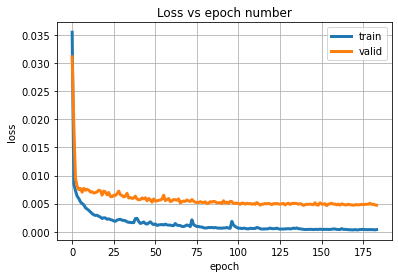

clean_duplicates_jcw model created and file saved for future use.
End model and train

Opening file:  clean_o_outliers.p
cleantrain/clean_o_outliers.p
Train Shape: (7020, 31)
Begin model and train:
Model name: clean_o_outliers_jcw
Scaling 7020 images...
Scaling of 7020 observations complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 32)        0         
_____________

175/175 [==============================] - 3s 20ms/step - loss: 0.0022 - mae: 0.0354 - mse: 0.0022 - val_loss: 0.0064 - val_mae: 0.0553 - val_mse: 0.0064

Epoch 00019: val_mae did not improve from 0.05302
Epoch 20/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - val_loss: 0.0064 - val_mae: 0.0570 - val_mse: 0.0064

Epoch 00020: val_mae did not improve from 0.05302
Epoch 21/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0024 - mae: 0.0367 - mse: 0.0024 - val_loss: 0.0065 - val_mae: 0.0564 - val_mse: 0.0065

Epoch 00021: val_mae did not improve from 0.05302
Epoch 22/300
175/175 [==============================] - 3s 19ms/step - loss: 0.0024 - mae: 0.0362 - mse: 0.0024 - val_loss: 0.0057 - val_mae: 0.0519 - val_mse: 0.0057

Epoch 00022: val_mae improved from 0.05302 to 0.05193, saving model to data/models/clean_o_outliers_jcw.h5
Epoch 23/300
175/175 [==============================] - 3s 20ms/step - loss: 0.0021 


Epoch 00054: val_mae did not improve from 0.04619
Epoch 55/300
175/175 [==============================] - 3s 18ms/step - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - val_loss: 0.0053 - val_mae: 0.0486 - val_mse: 0.0053

Epoch 00055: val_mae did not improve from 0.04619
Epoch 56/300
175/175 [==============================] - 3s 18ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - val_loss: 0.0047 - val_mae: 0.0459 - val_mse: 0.0047

Epoch 00056: val_mae improved from 0.04619 to 0.04591, saving model to data/models/clean_o_outliers_jcw.h5
Epoch 57/300
175/175 [==============================] - 3s 18ms/step - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - val_loss: 0.0047 - val_mae: 0.0460 - val_mse: 0.0047

Epoch 00057: val_mae did not improve from 0.04591
Epoch 58/300
175/175 [==============================] - 4s 20ms/step - loss: 0.0012 - mae: 0.0250 - mse: 0.0012 - val_loss: 0.0051 - val_mae: 0.0474 - val_mse: 0.0051

Epoch 00058: val_mae did not improve from 0.04591
Epoch 59/300
175/175


Epoch 00089: val_mae did not improve from 0.04324
Epoch 90/300
175/175 [==============================] - 4s 21ms/step - loss: 5.6651e-04 - mae: 0.0178 - mse: 5.6651e-04 - val_loss: 0.0045 - val_mae: 0.0436 - val_mse: 0.0045

Epoch 00090: val_mae did not improve from 0.04324
Epoch 91/300
175/175 [==============================] - 4s 21ms/step - loss: 6.6225e-04 - mae: 0.0188 - mse: 6.6225e-04 - val_loss: 0.0047 - val_mae: 0.0452 - val_mse: 0.0047

Epoch 00091: val_mae did not improve from 0.04324
Epoch 92/300
175/175 [==============================] - 4s 21ms/step - loss: 7.1766e-04 - mae: 0.0198 - mse: 7.1766e-04 - val_loss: 0.0044 - val_mae: 0.0432 - val_mse: 0.0044

Epoch 00092: val_mae improved from 0.04324 to 0.04317, saving model to data/models/clean_o_outliers_jcw.h5
Epoch 93/300
175/175 [==============================] - 4s 20ms/step - loss: 7.2395e-04 - mae: 0.0192 - mse: 7.2395e-04 - val_loss: 0.0044 - val_mae: 0.0434 - val_mse: 0.0044

Epoch 00093: val_mae did not improve f

175/175 [==============================] - 3s 19ms/step - loss: 4.4413e-04 - mae: 0.0153 - mse: 4.4413e-04 - val_loss: 0.0045 - val_mae: 0.0440 - val_mse: 0.0045

Epoch 00125: val_mae did not improve from 0.04206
Epoch 126/300
175/175 [==============================] - 3s 19ms/step - loss: 4.5804e-04 - mae: 0.0154 - mse: 4.5804e-04 - val_loss: 0.0044 - val_mae: 0.0428 - val_mse: 0.0044

Epoch 00126: val_mae did not improve from 0.04206
Epoch 127/300
175/175 [==============================] - 3s 19ms/step - loss: 4.2156e-04 - mae: 0.0151 - mse: 4.2156e-04 - val_loss: 0.0046 - val_mae: 0.0440 - val_mse: 0.0046

Epoch 00127: val_mae did not improve from 0.04206
Epoch 128/300
175/175 [==============================] - 3s 19ms/step - loss: 4.7491e-04 - mae: 0.0160 - mse: 4.7491e-04 - val_loss: 0.0044 - val_mae: 0.0431 - val_mse: 0.0044

Epoch 00128: val_mae did not improve from 0.04206
Epoch 129/300
175/175 [==============================] - 3s 20ms/step - loss: 4.5096e-04 - mae: 0.0158 - m

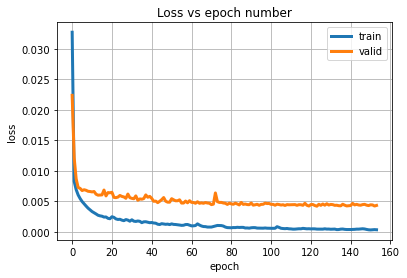

clean_o_outliers_jcw model created and file saved for future use.
End model and train



In [15]:

imp.reload(load_models)

file_path = "cleantrain/"
#files = os.listdir("../CleanTrain")
files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    print(clean_file)
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_jcw"))
    print("Model name:", model_name)
    #Run with separate = True to train on 8 columns of data
    model, history = trainer.train_jcw(model_name, train_data,verbose = True, separate = True)
    print("End model and train")    
    print()

### For every model file in a given path, predict using the model and save the predictions in CSV file

In [17]:
imp.reload(predict_models)
imp.reload(transform_data)

id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models/"
pred_path = "data/predictions/"

predictor = predict_models.PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_jcw(base_name, filename, model_json, test)
        print("End model and train")    
        print()


Model dir: data/models/
Pickle dir: data/predictions/
Working with:  clean_w_outliers_jcw
Begin Predict
Scaling 1783 images...
Scaling of 1783 observations complete.
Begining the split of Test
got unique ids
test subset shape: (1783, 4)
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after melt: (14264, 3)
after merge: (14250, 2)
data/predictions/clean_w_outliers_jcwPred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers_jcw
Begin Predict
Scaling 1783 images...
Scaling of 1783 observations complete.
Begining the split of Test
got unique ids
test subset shape: (1783, 4)
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after melt: (14264, 3)
after merge: (14250, 2)
data/predictions/clean_all_outliers_jcwPred.csv
Predictions written 
End model and train

Working with:  clean_w_dups_jcw
Begin Predict
Scaling 1783 images...
Scaling of 1783 observations complete.
Begining the split of Test
got unique ids
test subset shape: (1783, 4)
End w

In [ ]:
#From Sandip's models
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

Explorations on using different models for 8 vs. 30 predictions

In [ ]:
imp.reload(predict_models)
imp.reload(transform_data)

id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

In [ ]:
#Filtering to ids where image_id count == 8
new_id = id_lookup.groupby("image_id").agg('count')
new_id_2 = new_id[new_id[ "row_id" ] <= 8]
new_id_1 = new_id[new_id[ "row_id" ] > 8]
print(new_id_2.index)
print(new_id_1.index)


In [20]:
id_lookup_1 = id_lookup[id_lookup['image_id']<=591]
id_lookup_2 = id_lookup[id_lookup['image_id'] > 591]

In [ ]:
test_1 = test[test['image_id']<=591]
test_1

In [ ]:
test_2 = test[test['image_id']>591]
test_2

In [24]:
#Identify where in the id_lookup is the last output row
print(np.max(id_lookup_1['row_id']))
print(np.min(id_lookup_1['row_id']))

max_row_full = np.max(id_lookup_1['row_id'])

17592
1


The first 591 rows of the id lookups require more than 8 keypoints. Afterwards the next 1192 rows only require 6 or 8 keypoints.

In [ ]:
id_lookup = id_lookup_2
test = test_2
pred_path = "data/predictions/"

predictor = predict_models.PredictModels(file_path,pred_path , id_lookup)

model_json = "data/models/clean_w_outliers_jcw.json"
model_file = "data/models/clean_w_outliers_jcw.h5"
json_file = open(model_json, "r")
model_json_data = json_file.read()
json_file.close()
model = model_from_json(model_json_data)
model.load_weights(model_file)
base_name = "clean_w_outliers_jcw"
filename = model_file
Y= predictor.predict_jcw(base_name, filename, model_json, test)

In [37]:
cd intro_ml/blackboxes/

/Users/joanieweaver/Desktop/intro_ml/blackboxes


## Reading in prediction csvs to combine to make final prediction file

In [39]:
file_path = "data/predictions/"
files = os.listdir(file_path)

for file in files:
    predictions_separate= pd.read_csv("data/predictions/"+file)
    predictions_full = pd.read_csv("data/predictions_full/"+file)
    new_pred = predictions_separate[predictions_separate['RowId']>max_row_full].copy()
    new_pred = new_pred.append(predictions_full[predictions_full['RowId']<=max_row_full].copy())
    new_pred = new_pred.sort_values(by=['RowId'])
    new_pred.to_csv("combined_"+file,index=False)
    